# Homework 2 Problem 1

In [166]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import sproot
import sys

In [147]:
with open('raman.txt', 'r') as file:
    lines = file.readlines()
    
wavenumbers = []
intensities = []

for line in lines:
    values = line.split()
    if len(values) == 2:
        wavenumbers.append(float(values[0]))
        intensities.append(float(values[1]))

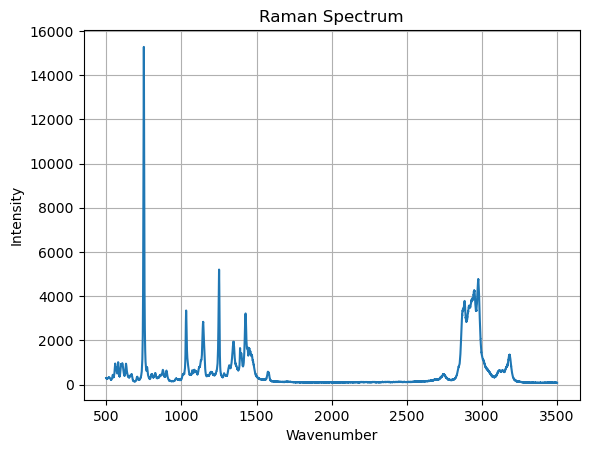

In [148]:
plt.figure()
plt.plot(wavenumbers, intensities)
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('Raman Spectrum')
plt.grid(True)
plt.show()

### 1a: Print the wavenumber estimates for the eight largest spectral peak to STDOUT sorted by magnitude (largest first).

In [165]:
peaks, _ = find_peaks(intensities, height = 3000)
raw_peaks = []
for i in peaks:
    wavenumbers_val = wavenumbers[i]
    intensities_val = intensities[i]
    raw_peaks.append((wavenumbers_val, intensities_val))

In [168]:
# Sort the peak wavenumbers by magnitude in descending order
raw_peaks.sort(key=lambda x: x[1], reverse=True)

top_eight_peaks = []
# Print top 8
for i in range(8):
    print(raw_peaks[i], file=sys.stdout)
    top_eight_peaks.append(i)


(750.42657, 15275.059)
(1250.886, 5203.3115)
(2975.9155, 4767.228)
(2974.7341, 4756.6265)
(2977.0967, 4666.8809)
(2977.8843, 4603.4209)
(2947.959, 4266.6968)
(2948.7466, 4247.2852)


In [ ]:
# Make splines for top 8
for raw_peak in top_eight_peaks:
    x 
    region_start = peak_wavenumber - n1
    region_end = peak_wavenumber + n1

### 1b Create a figure that shows the Raman data (intensity vs. wavenumber) and mark each of the maximum intensity values.

In [150]:
# Define the width for regions of interest
n1 = 10  # Adjust as needed

# Initialize a dictionary to store peak wavenumbers and intensities
peak_data = {}

In [153]:
# Loop through detected peaks
for peak_index in peaks:
    peak_wavenumber = wavenumbers[peak_index]
    
    # Define the region of interest around the peak
    region_start = peak_wavenumber - n1
    region_end = peak_wavenumber + n1

    # Filter data within the region of interest
    region_wavenumbers = []
    region_intensities = []
    
    for i, wavenumber in enumerate(wavenumbers):
        if wavenumber >= region_start and wavenumber <= region_end:
            region_wavenumbers.append(wavenumber)
            region_intensities.append(intensities[i])
    
    # Make a spline for region of interest
    spline = UnivariateSpline(region_wavenumbers, region_intensities, s=0)
    
    # Calculate the derivative of the spline
    derivative = spline.derivative()
    
    # Find zero-crossings of the derivative
    zero_crossings = []
    for i in range(1, len(region_wavenumbers) - 1):
        if derivative(region_wavenumbers[i - 1]) * derivative(region_wavenumbers[i + 1]) < 0:
            zero_crossings.append(int(region_wavenumbers[i]))
        
    # Select the wavenumber with the maximum intensity within the region
    if zero_crossings:
        # Calculate the intensity values at zero-crossings
        zero_crossing_intensities = [spline(zc) for zc in zero_crossings]

        # Find the index of the maximum intensity among zero-crossings
        max_intensity_index = np.argmax(zero_crossing_intensities)
        
        print("Zero Crossings:", zero_crossings)
        print("Zero Crossing Intensities:", zero_crossing_intensities)
        print("Max Intensity Index:", max_intensity_index)

        # Check if the index is within a valid range
        if max_intensity_index < len(zero_crossings):
            # Retrieve the actual wavenumber corresponding to the maximum intensity found within the region
            max_intensity_wavenumber = zero_crossings[max_intensity_index]
        else:
            # Handle the case where the index is out of range
            max_intensity_wavenumber = None
    else:
        # If no zero-crossings found, use the peak wavenumber
        max_intensity_wavenumber = None
        
    # Store the peak data in the dictionary
    peak_data[peak_wavenumber] = max_intensity_wavenumber

Zero Crossings: [750, 750]
Zero Crossing Intensities: [array(15252.38673004), array(15252.38673004)]
Max Intensity Index: 0
Zero Crossings: [1031, 1031]
Zero Crossing Intensities: [array(3190.9652609), array(3190.9652609)]
Max Intensity Index: 0
Zero Crossings: [1144, 1144, 1145, 1145]
Zero Crossing Intensities: [array(2785.99832824), array(2785.99832824), array(2814.24148285), array(2814.24148285)]
Max Intensity Index: 2
Zero Crossings: [1250, 1251]
Zero Crossing Intensities: [array(4965.47295757), array(5210.95953229)]
Max Intensity Index: 1
Zero Crossings: [1427, 1427, 1436, 1436]
Zero Crossing Intensities: [array(3210.83736965), array(3210.83736965), array(1661.2393195), array(1661.2393195)]
Max Intensity Index: 0
Zero Crossings: [2868, 2868, 2869, 2869, 2871, 2871, 2871, 2872, 2872, 2873, 2873, 2875, 2875, 2876, 2877, 2877, 2878, 2879, 2880, 2881]
Zero Crossing Intensities: [array(3129.73491769), array(3129.73491769), array(3187.56163388), array(3187.56163388), array(3342.12188542

In [154]:
for i in peak_data:
    print(i)
    #print(peak_data[i])

750.42657
1031.9596
1145.3602
1250.886
1427.287
2873.9336
2884.5649
2894.0149
2902.6775
2907.7964
2913.3088
2920.0027
2924.334
2931.0276
2935.3589
2939.2964
2944.0215
2947.959
2951.8965
2962.5278
2975.9155


In [155]:

# Print the wavenumber estimates for the eight largest spectral peaks
for i, wavenumber in enumerate(sorted_peak_wavenumbers[-8:], start=1):
    print(f"Peak {i}: {wavenumber}")

Peak 1: 2884.5649
Peak 2: 2894.0149
Peak 3: 2873.9336
Peak 4: 1427.287
Peak 5: 1250.886
Peak 6: 1145.3602
Peak 7: 1031.9596
Peak 8: 750.42657


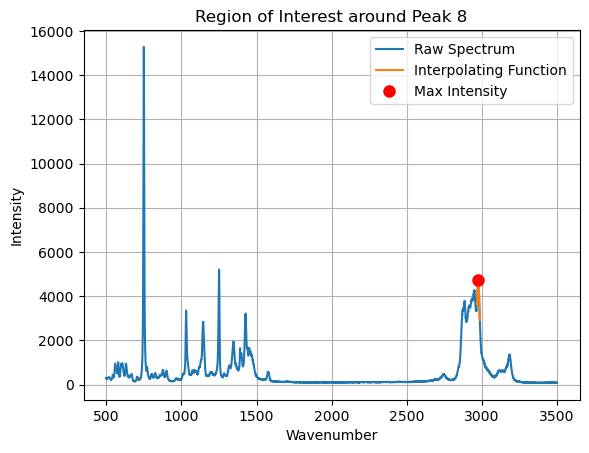

In [156]:
plt.figure()
plt.plot(wavenumbers, intensities, label='Raw Spectrum')
plt.plot(region_wavenumbers, spline(region_wavenumbers), label='Interpolating Function')
plt.plot(max_intensity_wavenumber, spline(max_intensity_wavenumber), 'ro', markersize=8, label='Max Intensity')
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title(f'Region of Interest around Peak {i}')
plt.legend()
plt.grid(True)
plt.show()

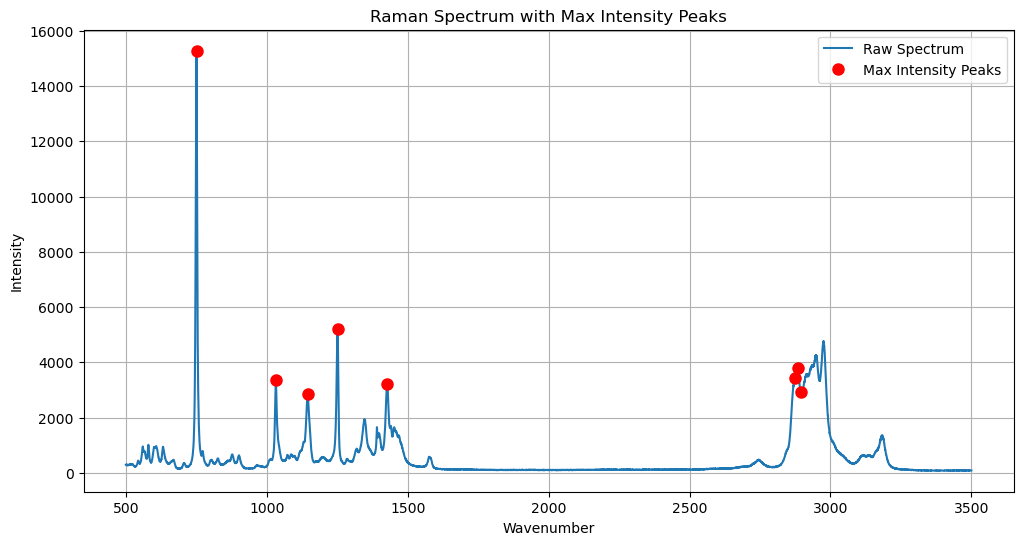

In [160]:
# Create a figure for the Raman data with maximum intensity values marked
plt.figure(figsize=(12, 6))
plt.plot(wavenumbers, intensities, label='Raw Spectrum')

# Select the last 8 peak wavenumbers
last_8_peak_wavenumbers = sorted_peak_wavenumbers[-8:]

# Initialize a list to store the corresponding intensities
max_intensity_values = []

# Loop through the last 8 peak wavenumbers
for wavenumber in last_8_peak_wavenumbers:
    # Find the index where the wavenumber matches in the wavenumbers list
    # np.where returns wavenumbers which are equal to the wavenumber we're looking for
    matching_indices = np.where(np.array(wavenumbers) == wavenumber)[0]
    
    # Check if any matches were found
    if matching_indices:
        # Use the first match to access the corresponding intensity
        intensity = intensities[matching_indices[0]]
        
        # Append the intensity to the list
        max_intensity_values.append(intensity)
    else:
        # Handle the case where no match was found
        max_intensity_values.append(None)

# Plot the last 8 peak wavenumbers with their corresponding max intensity values
plt.plot(last_8_peak_wavenumbers, max_intensity_values, 'ro', markersize=8, label='Max Intensity Peaks')


plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('Raman Spectrum with Max Intensity Peaks')
plt.legend()
plt.grid(True)
plt.show()